In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.io import loadmat

In [2]:
#/Home/difdop/DBSdata/processed/fDop_estimation/west
#/Home/difdop/DBSdata/processed/beamtracing/west/
#57558, 58333

gnr_path_fdop = "/Home/difdop/DBSdata/processed/fDop_estimation/west/{}_FO/_ch{}_isweep{}.mat"
gnr_path_btr = "/Home/difdop/DBSdata/processed/beamtracing/west/{}_FO/ch{}_modex{}_isweep{}.mat"
shot = 57558
ch = 1
#mode = 0
isweep = 11


In [52]:
#load data 

def arr(outp, DBS, val):
    
    if DBS == 'fDop':
        
        fDop = outp['fDop'][0][0, val == 1]
        probfr = outp['freqGHz'][0][0, val == 1]
        dfDop = outp['dfDop'][0][0, val == 1]
        return fDop, probfr, dfDop
    
    elif DBS == 'beam':
        k_perp = outp['k_perp'][0][0, val == 1]
        rho = outp['rho'][0][0, val == 1]
        return k_perp*2, rho
    
        
def load_data(shot, ch, isweep):
    global gnr_path_fdop, gnr_path_btr
    
    if ch == 1:
        mode = 0
    else:
        mode = 1
        
    filename_fdop = gnr_path_fdop.format(shot, ch, isweep)
    filename_btr = gnr_path_btr.format(shot, ch, mode, isweep)
    
    fdop_est = loadmat(filename_fdop)['outp'][0]
    beam_trc = loadmat(filename_btr)['outp'][0]
    
    validated = fdop_est['validated'][0][0]
    
    fDop, probfr, dfDop = arr(fdop_est, 'fDop', validated)
    k_perp, rho = arr(beam_trc, 'beam', validated)
    v_perp = 2*np.pi*fDop/(k_perp*1e2)

    return np.array([probfr, fDop, dfDop, rho, v_perp])

In [53]:
shot = 57558
isweep = 11
sh57558_V11 = load_data(shot, 1, isweep)
sh57558_W11 = load_data(shot, 2, isweep)

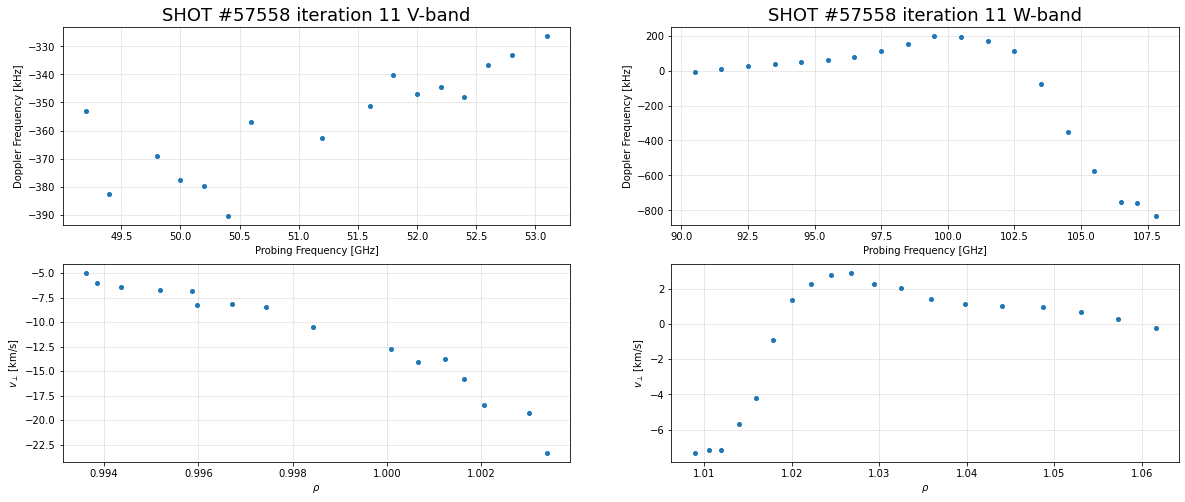

In [54]:
# plot the validated spectra as a function of the probing frequency 

fig, ax = plt.subplots(2,2, figsize = (20,8))
ax[0,0].set_title('SHOT #%d iteration %d V-band' %(shot,isweep), size = 18)
ax[0,0].plot(sh57558_V11[0], sh57558_V11[1]*1e-3, '.', markersize = 8)
ax[0,0].set_xlabel('Probing Frequency [GHz]')
ax[0,0].set_ylabel('Doppler Frequency [kHz]')
ax[0,0].grid(c = 'silver', ls ='--', lw = 0.5)

ax[1,0].plot(sh57558_V11[3], sh57558_V11[4]*1e-3, '.', markersize = 8)
ax[1,0].set_xlabel(r'$\rho$')
ax[1,0].set_ylabel(r'$v_{\perp}$ [km/s]')
ax[1,0].grid(c = 'silver', ls ='--', lw = 0.5)

ax[0,1].set_title('SHOT #%d iteration %d W-band' %(shot,isweep), size = 18)
ax[0,1].plot(sh57558_W11[0], sh57558_W11[1]*1e-3, '.', markersize = 8)
ax[0,1].set_xlabel('Probing Frequency [GHz]')
ax[0,1].set_ylabel('Doppler Frequency [kHz]')
ax[0,1].grid(c = 'silver', ls ='--', lw = 0.5)

ax[1,1].plot(sh57558_W11[3], sh57558_W11[4]*1e-3, '.', markersize = 8)
ax[1,1].set_xlabel(r'$\rho$')
ax[1,1].set_ylabel(r'$v_{\perp}$ [km/s]')
ax[1,1].grid(c = 'silver', ls ='--', lw = 0.5)

In [60]:
shot = 58333
isweep = 8
sh58333_V8 = load_data(shot, 1, isweep)
sh58333_W8 = load_data(shot, 2, isweep)


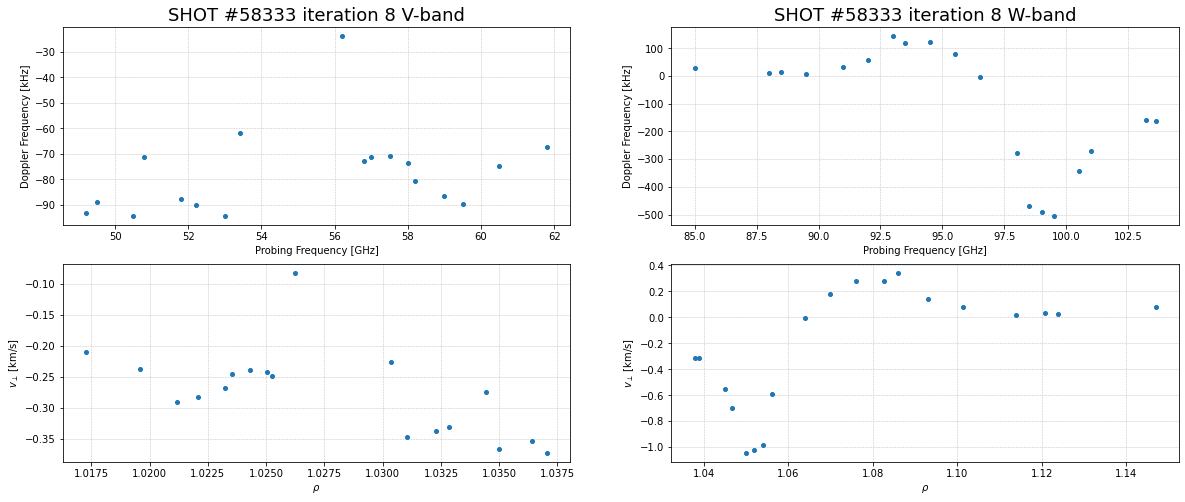

In [61]:
fig, ax = plt.subplots(2,2, figsize = (20,8))
ax[0,0].set_title('SHOT #%d iteration %d V-band' %(shot,isweep), size = 18)
ax[0,0].plot(sh58333_V8[0,], sh58333_V8[1]*1e-3, '.', markersize = 8)
ax[0,0].set_xlabel('Probing Frequency [GHz]')
ax[0,0].set_ylabel('Doppler Frequency [kHz]')
ax[0,0].grid(c = 'silver', ls ='--', lw = 0.5)

ax[1,0].plot(sh58333_V8[3], sh58333_V8[4]*1e-3, '.', markersize = 8)
ax[1,0].set_xlabel(r'$\rho$')
ax[1,0].set_ylabel(r'$v_{\perp}$ [km/s]')
ax[1,0].grid(c = 'silver', ls ='--', lw = 0.5)

ax[0,1].set_title('SHOT #%d iteration %d W-band' %(shot,isweep), size = 18)
ax[0,1].plot(sh58333_W8[0], sh58333_W8[1]*1e-3, '.', markersize = 8)
ax[0,1].set_xlabel('Probing Frequency [GHz]')
ax[0,1].set_ylabel('Doppler Frequency [kHz]')
ax[0,1].grid(c = 'silver', ls ='--', lw = 0.5)

ax[1,1].plot(sh58333_W8[3], sh58333_W8[4]*1e-3, '.', markersize = 8)
ax[1,1].set_xlabel(r'$\rho$')
ax[1,1].set_ylabel(r'$v_{\perp}$ [km/s]')
ax[1,1].grid(c = 'silver', ls ='--', lw = 0.5)

In [65]:
from DBS.analysis import DBS_Profile
machine, shot, isweep, xmode, ch = 'west', 58333, 8, True, 2
args = (machine, shot, isweep, xmode, ch)
prof = DBS_Profile(*args) # works like a pandas dataframe

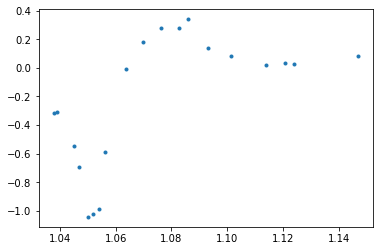

In [71]:
plt.plot(prof.rho_psi.values[valid], prof.v_perp.values[valid]*1e-3, '.')

ifreq     f0         t   rho_psi         R         Z  \
shot  xmode isweep                                                         
58333 True  8           1   85.0  14.20017  1.146957  3.023108  0.260814   
            8           2   88.0  14.21017  1.123879  2.999892  0.274015   
            8           3   91.0  14.22017  1.101345  2.972272  0.296652   
            8           4   93.0  14.23017  1.085902  2.954904  0.306637   
            8           5   94.5  14.24017  1.076102  2.944388  0.312706   
            8           6   96.5  14.25017  1.063837  2.932093  0.318750   
            8           7   98.5  14.26017  1.053993  2.923094  0.321600   
            8           8   99.5  14.27017  1.049971  2.919805  0.322027   
            8           9  101.0  14.28017  1.045052  2.916139  0.321937   
            8          10  103.6  14.29017  1.037788  2.908944  0.324860   
            8          11  103.2  14.30017  1.038839  2.910068  0.324299   
            8          12  101.5  14.31017  1.043646  2.914694  0.322596   
            8          13  100.5  14.32017  1.046660  2.917142  0.322302   
            8          14   99.0  14.33017  1.051891  2.921385  0.321808   
            8          15   98.0  14.34017  1.056225  2.925063  0.321107   
            8          16   97.5  14.35017  1.058627  2.927204  0.320527   
            8          17   95.5  14.36017  1.069811  2.938097  0.315826   
            8          18   93.5  14.37017  1.082593  2.951460  0.308389   
            8          19   92.0  14.38017  1.093097  2.962383  0.303205   
            8          20   89.5  14.39017  1.113778  2.987758  0.283877   
            8          21   88.5  14.40017  1.120839  2.996301  0.276855   
            8          22   94.3  14.41017  1.077345  2.945839  0.311668   
            8          23   95.3  14.42017  1.071046  2.939320  0.315239   
            8          24   96.3  14.43017  1.065030  2.933116  0.318515   
            8          25   98.3  14.44017  1.054789  2.924023  0.321023   
            8          26   99.3  14.45017  1.050703  2.920449  0.321869   
            8          27  100.4  14.46017  1.046860  2.917705  0.321589   
            8          28  100.9  14.47017  1.043047  2.922685  0.307582   
            8          29  101.3  14.48017  1.041443  2.922630  0.305501   
            8          30  102.0  14.49017  1.039294  2.920772  0.306052   
            8          31  102.5  14.50017  1.038004  2.919038  0.307516   
            8          32  103.5  14.51017  1.035201  2.916511  0.308388   
            8          33  100.3  14.52017  1.044590  2.925140  0.305075   
            8          34   99.2  14.53017  1.048304  2.927871  0.304994   
            8          35   98.7  14.54017  1.050199  2.929288  0.304903   
            8          36   98.2  14.55017  1.052307  2.930962  0.304607   
            8          37   97.3  14.56017  1.056640  2.934358  0.304070   
            8          38   95.7  14.57017  1.065611  2.942460  0.300846   
            8          39   93.7  14.58017  1.078299  2.955612  0.293284   
            8          40   92.0  14.59017  1.090182  2.967106  0.288325   
            8          41   92.0  14.60017  1.090221  2.967041  0.288536   
            8          42   96.5  14.61017  1.060923  2.938013  0.302950   
            8          43   96.5  14.62017  1.060903  2.938054  0.302838   
            8          44   96.5  14.63017  1.060869  2.938125  0.302646   
            8          45   99.3  14.64017  1.047943  2.927619  0.304980   
            8          46   99.4  14.65017  1.047531  2.927535  0.304566   
            8          47   99.5  14.66017  1.047191  2.927261  0.304620   
            8          48  102.0  14.67017  1.039398  2.920517  0.306666   
            8          49  102.3  14.68017  1.037451  2.922465  0.300360   
            8          50  102.5  14.69017  1.035213  2.926177  0.290008   
            8          51  103.3  14.70017  1.032963  2.923934  0.29

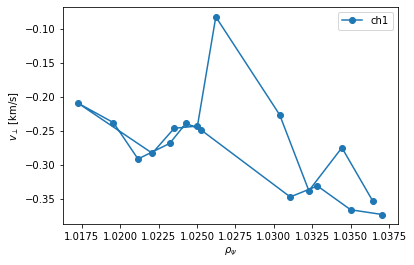

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
prof.plot(ax=ax, label=f'ch{ch}')
ax.legend()